In [1]:
#step1:Importing important libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_27500\2780638517.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#step2:Loading CSV file into sales
sales=pd.read_csv('advertising.csv')

In [6]:
#step3:Observing first five rows and columns of the dataset
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [37]:
#step4:Viewing the number rows and columns present plus the valuable information from all the columns
sales.shape
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#Step5:Observing the Description of each column
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
#observation:The maximum Sales ratio value is 27 and minimum is 1.6
#step6:Observing if any null value exist in any of the columns
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

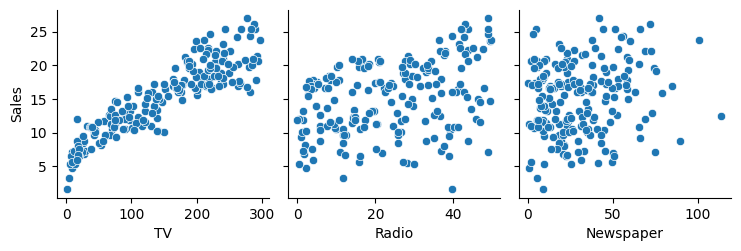

In [13]:
#step7:As no null value exists,we can move on to exploring data in pictorial format using scatter plot
sns.pairplot(sales,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

In [14]:
#Observation:TV ads sales increasing on increase in advertisement
#Radio ads and newspaper ads sales are unpredictable

In [15]:
#step8:Finding correlation
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

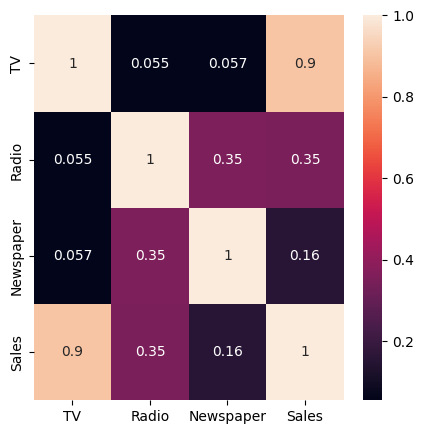

In [17]:
#step9:Viewing correlation using heatmap
corr=sales.corr()
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax)

In [18]:
#We can observe that the TV sales is highly correlated to the total sale,So the optimality can be achieved if the adverstisement
#funds are invested for the sales of TV rather than Radio and Newspaper

In [19]:
#step10:Model training using LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sales[['TV']],sales[['Sales']],test_size=0.2,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [22]:
#step 11:Generating predictions for the test data using the trained linear regression model 
result=model.predict(x_test)
print(result)

[[10.92912965]
 [ 9.88399105]
 [12.08313684]
 [22.93189318]
 [16.42699412]
 [10.22148373]
 [ 7.63585439]
 [20.23195181]
 [ 8.45781235]
 [17.91849399]
 [21.38595901]
 [11.90894708]
 [15.68668762]
 [17.38503783]
 [11.32105662]
 [13.70527904]
 [21.62002651]
 [ 7.20037998]
 [11.22851831]
 [18.77855596]
 [22.81758114]
 [14.7994085 ]
 [16.6937222 ]
 [14.33127351]
 [10.07451111]
 [13.86313851]
 [16.17659633]
 [18.32130782]
 [19.35555956]
 [ 8.52857694]
 [10.85292163]
 [17.98925858]
 [22.44198446]
 [20.3190467 ]
 [ 7.88080875]
 [ 8.18019741]
 [10.40656035]
 [17.00399772]
 [10.88558221]
 [ 8.52313351]]


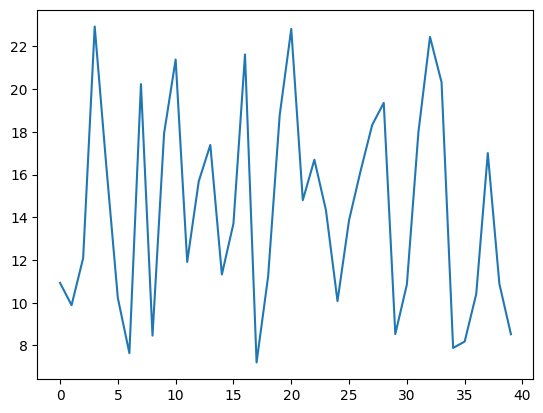

In [34]:
#step12:Viewing the prediction result in plot
plt.plot(result)

In [25]:
#step13:Evaluating performance,coefficient on sales through TV,Newspaper,Radio
# Training model using Radio column
x_train_radio, x_test_radio, y_train_radio, y_test_radio = train_test_split(sales[['Radio']], sales[['Sales']], test_size=0.2, random_state=0)
model_radio = LinearRegression()
model_radio.fit(x_train_radio, y_train_radio)
result_radio = model_radio.predict(x_test_radio)

# Training model using Newspaper column
x_train_newspaper, x_test_newspaper, y_train_newspaper, y_test_newspaper = train_test_split(sales[['Newspaper']], sales[['Sales']], test_size=0.2, random_state=0)
model_newspaper = LinearRegression()
model_newspaper.fit(x_train_newspaper, y_train_newspaper)
result_newspaper = model_newspaper.predict(x_test_newspaper)

# Comparing the performance of the models
print("Performance of TV model:", model.score(x_test, y_test))
print("Performance of Radio model:", model_radio.score(x_test_radio, y_test_radio))
print("Performance of Newspaper model:", model_newspaper.score(x_test_newspaper, y_test_newspaper))

# Evaluating coefficients
print("Coefficient for TV:", model.coef_)
print("Coefficient for Radio:", model_radio.coef_)
print("Coefficient for Newspaper:", model_newspaper.coef_)


Performance of TV model: 0.8010943934328408
Performance of Radio model: 0.07721709578473657
Performance of Newspaper model: -0.04777401704458972
Coefficient for TV: [[0.0544343]]
Coefficient for Radio: [[0.12350772]]
Coefficient for Newspaper: [[0.04469941]]


In [26]:
#The performance and coefficinet of TV sales is hugely larger than that of Radio and Newspaper

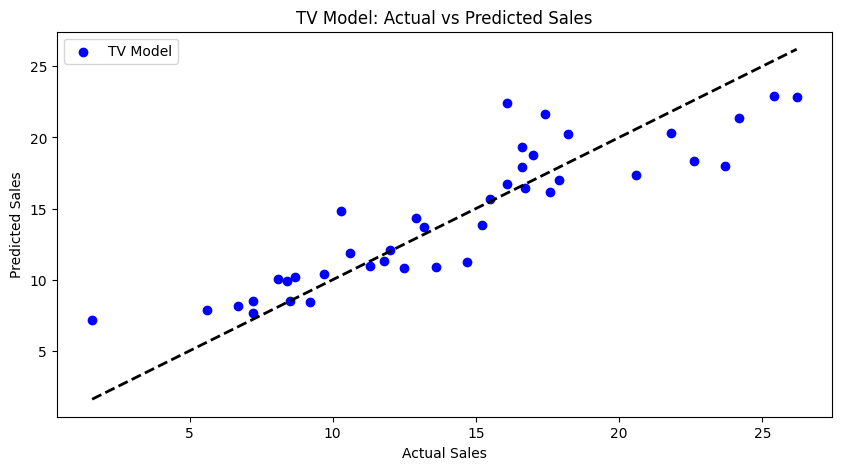

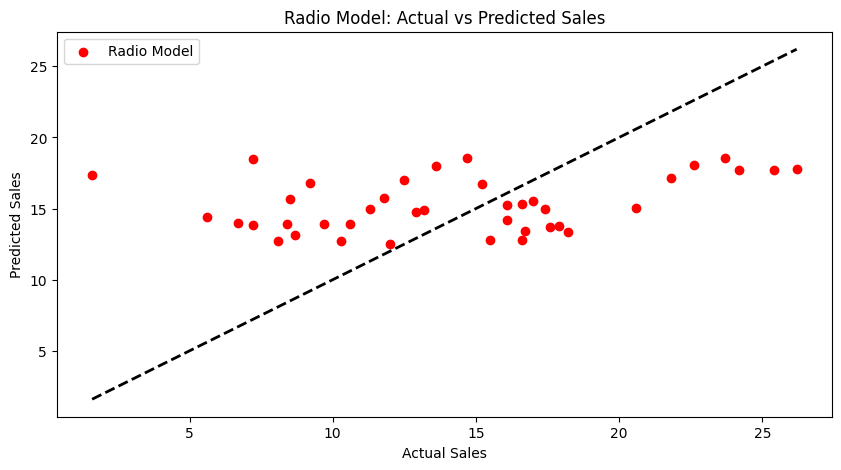

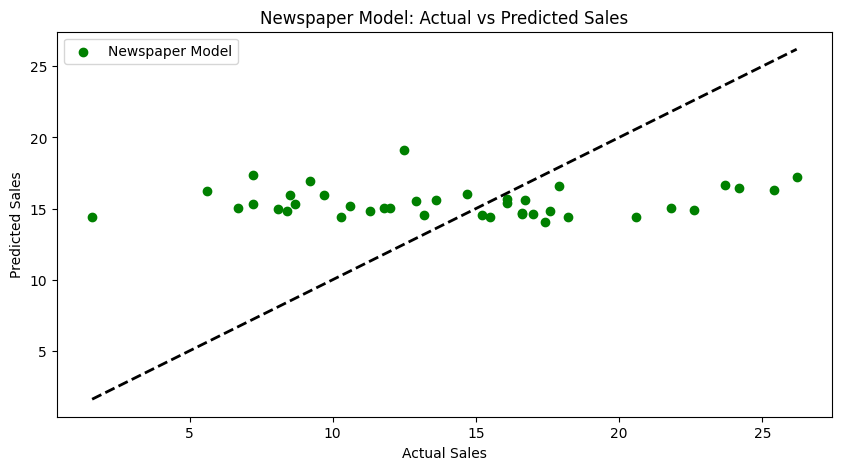

In [29]:
#step14:Observing the scatter plot for TV,Radio,Newspaper where we have actual and predicted sales.
# Scatter plot for TV model
plt.figure(figsize=(10, 5))
plt.scatter(y_test, result, color='blue', label='TV Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('TV Model: Actual vs Predicted Sales')
plt.legend()
plt.show()

# Scatter plot for Radio model
plt.figure(figsize=(10, 5))
plt.scatter(y_test_radio, result_radio, color='red', label='Radio Model')
plt.plot([y_test_radio.min(), y_test_radio.max()], [y_test_radio.min(), y_test_radio.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Radio Model: Actual vs Predicted Sales')
plt.legend()
plt.show()

# Scatter plot for Newspaper model
plt.figure(figsize=(10, 5))
plt.scatter(y_test_newspaper, result_newspaper, color='green', label='Newspaper Model')
plt.plot([y_test_newspaper.min(), y_test_newspaper.max()], [y_test_newspaper.min(), y_test_newspaper.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Newspaper Model: Actual vs Predicted Sales')
plt.legend()
plt.show()


In [30]:
#observation:The actual and the predicted sales for the TV is very close and overlapping rather than for Radio and Newspaper

In [35]:
#step15: Calculating R^2 score in percentage for accuracy
r2 = model.score(x_test, y_test)
r2_percentage = r2 * 100

print("R^2 score (percentage):", r2_percentage)


R^2 score (percentage): 80.10943934328408


In [39]:
#Conclusion:Coefficient Analysis,Model performance analysis,Visual analysis findings concludes that
# investing in TV advertising is more effective in driving sales compared to Radio and Newspaper advertising for the given dataset.

In [9]:
#step16:Trying to predict sales ratio for next five years if focus is only made on TV ads

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


sales = pd.read_csv('advertising.csv')
x_train_tv, x_test_tv, y_train_tv, y_test_tv = train_test_split(sales[['TV']], sales['Sales'], test_size=0.2, random_state=0)
model_tv = LinearRegression()
model_tv.fit(x_train_tv, y_train_tv)

future_years = list(range(2025, 2031))
predicted_sales = model_tv.predict([[i] for i in future_years])
predictions_df = pd.DataFrame({'Year': future_years, 'Predicted Sales': predicted_sales})

#step17: Saving predictions to a CSV file
predictions_df.to_csv('sales_predictions_tv.csv', index=False)

C:\Users\PREODATOR HELIOS 300\AppData\Local\Temp\ipykernel_36228\4150859437.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\PREODATOR HELIOS 300\Desktop\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
